In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/electronics_computers_pc.csv')

# Display the first few rows
print(df.head())

   HDD apjoms, Gb: DVD:  Operatīvā atmiņa, Gb:  \
0           2000.0    -                   32.0   
1           1000.0    -                   16.0   
2           1000.0    -                   32.0   
3           1000.0    -                   16.0   
4            500.0    -                   16.0   

                                Video:                    Pamat plate:  \
0   Geforce rtx3070 8gb gddr6 12000mhz       H310 fsb8000mts usb/sata3   
1          Geforce rtx4070 12gb gddr6x       H410 fsb8000mts usb/sata3   
2  Asus tuf gaming rtx 4070 ti 12gb oc  Asus Rog Strix B660-F Gaming W   
3             Geforce gt1030 2gb gddr5                  B81 fsb4000mts   
4     Msi ventus 2x oc rtx 4060 ti 8gb            Asus Prime B450-Plus   

   Procesora frekvence, Ghz: Stāvoklis: Atrašanās vieta: Darba dienas:  \
0                     4600.0      jaun.              NaN           NaN   
1                     5300.0      jaun.              NaN           NaN   
2                        5.2    

### Price Analysis

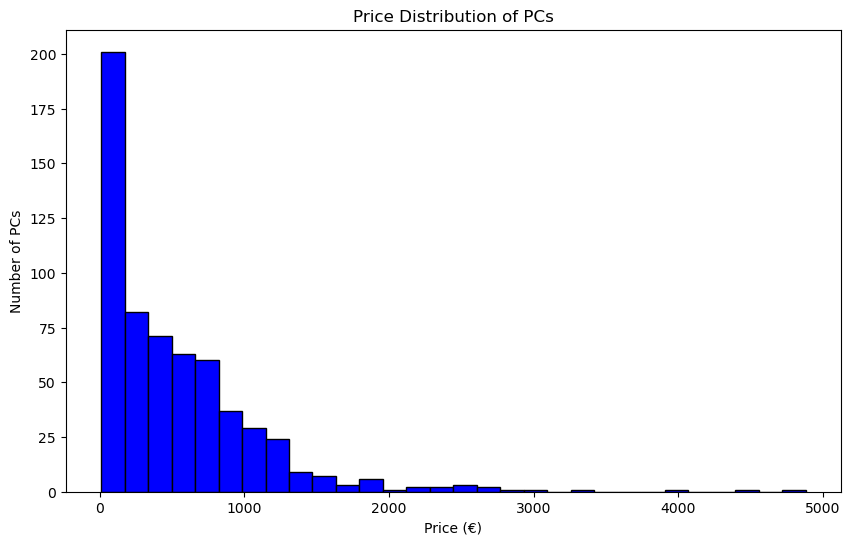

In [2]:
df['Cena'] = df['Cena'].str.replace('€', '').str.replace(' ', '').astype(float)
plt.figure(figsize=(10, 6))
plt.hist(df['Cena'], bins=30, color='blue', edgecolor='black')
plt.title('Price Distribution of PCs')
plt.xlabel('Price (€)')
plt.ylabel('Number of PCs')
plt.show()


### Processor Analysis

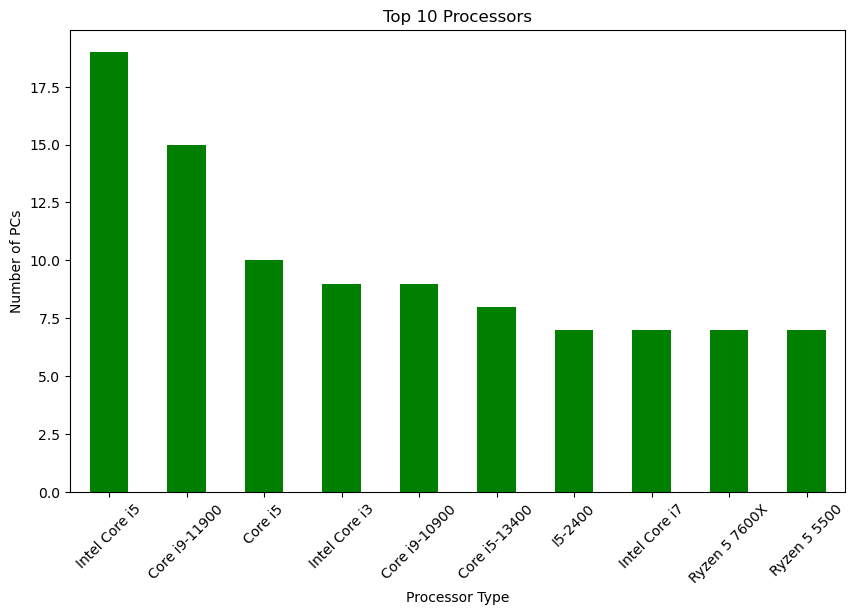

In [3]:
processor_counts = df['Procesors:'].value_counts().head(10)

plt.figure(figsize=(10, 6))
processor_counts.plot(kind='bar', color='green')
plt.title('Top 10 Processors')
plt.xlabel('Processor Type')
plt.ylabel('Number of PCs')
plt.xticks(rotation=45)
plt.show()


### Memory Analysis

In [20]:
filtered_df = df[df['Operatīvā atmiņa, Gb:'] <= 64]

In [24]:
filtered_df[:3]

,"HDD apjoms, Gb:",DVD:,"Operatīvā atmiņa, Gb:",Video:,Pamat plate:,"Procesora frekvence, Ghz:",Stāvoklis:,Atrašanās vieta:,Darba dienas:,URL,Cena,Procesors:,GPU Brand,CPU Brand
0,2000.0,-,32.0,Geforce rtx3070 8gb gddr6 12000mhz,H310 fsb8000mts usb/sata3,4600.0,jaun.,NaN,NaN,https://www.ss.lv/msg/lv/electronics/computers...,959.0,Core i7-9700,Geforce,Core
1,1000.0,-,16.0,Geforce rtx4070 12gb gddr6x,H410 fsb8000mts usb/sata3,5300.0,jaun.,NaN,NaN,https://www.ss.lv/msg/lv/electronics/computers...,1199.0,Core i9-10900,Geforce,Core
2,1000.0,-,32.0,Asus tuf gaming rtx 4070 ti 12gb oc,Asus Rog Strix B660-F Gaming W,5.2,jaun.,NaN,NaN,https://www.ss.lv/msg/lv/electronics/computers...,1950.0,I7 13700,Asus,I7


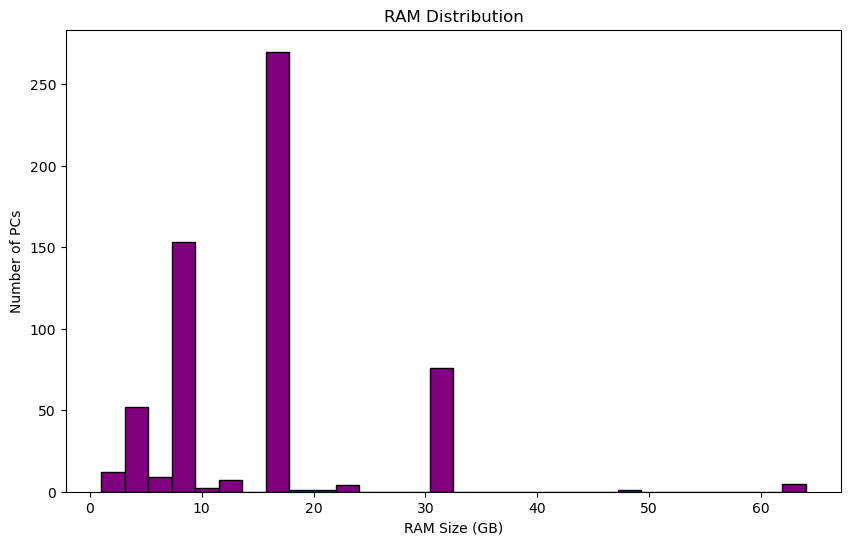

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Operatīvā atmiņa, Gb:'].dropna(), bins=30, color='purple', edgecolor='black')
plt.title('RAM Distribution')
plt.xlabel('RAM Size (GB)')
plt.ylabel('Number of PCs')
plt.show()


### Video Card Analysis

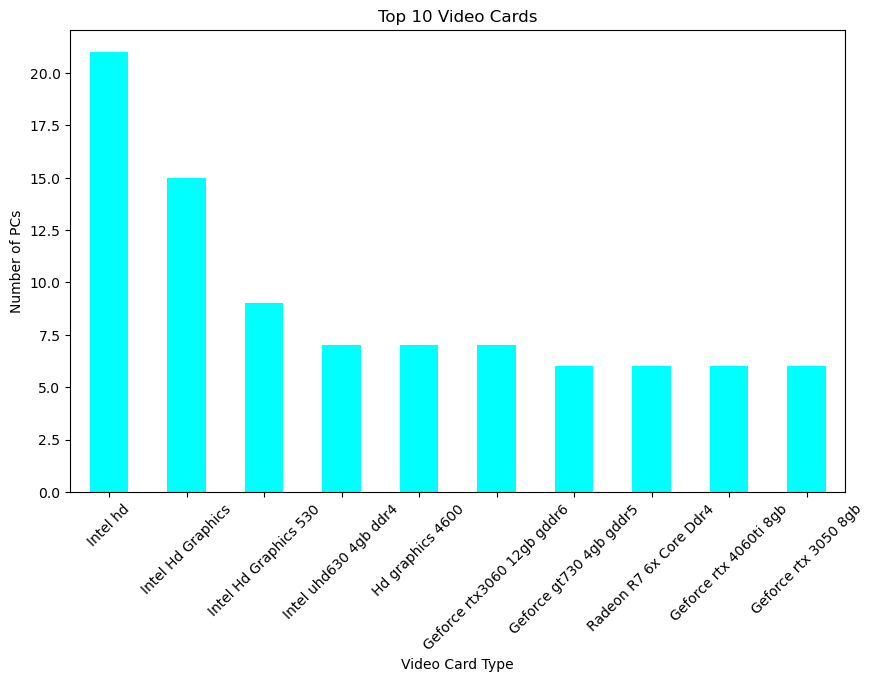

In [6]:
video_card_counts = df['Video:'].value_counts().head(10)

plt.figure(figsize=(10, 6))
video_card_counts.plot(kind='bar', color='cyan')
plt.title('Top 10 Video Cards')
plt.xlabel('Video Card Type')
plt.ylabel('Number of PCs')
plt.xticks(rotation=45)
plt.show()


### Correlation Analysis

In [8]:
# Convert the 'Cena' column to string type
df['Cena'] = df['Cena'].astype(str)

# Cleaning the 'Cena' column to extract numerical values
df['Cena'] = df['Cena'].str.replace('€', '').str.replace(' ', '').astype(float)


In [19]:
print(df.columns)

Index(['HDD apjoms, Gb:', 'DVD:', 'Operatīvā atmiņa, Gb:', 'Video:',
       'Pamat plate:', 'Procesora frekvence, Ghz:', 'Stāvoklis:',
       'Atrašanās vieta:', 'Darba dienas:', 'URL', 'Cena', 'Procesors:',
       'GPU Brand', 'CPU Brand'],
      dtype='object')


In [17]:
correlation_matrix = df[['HDD apjoms, Gb:', 'Operatīvā atmiņa, Gb:', 'Procesora frekvence, Ghz:', 'Cena']].corr()
print(correlation_matrix['Cena'])

HDD apjoms, Gb:              0.455182
Operatīvā atmiņa, Gb:        0.205174
Procesora frekvence, Ghz:    0.253947
Cena                         1.000000
Name: Cena, dtype: float64


### Brand Analysis

In [9]:
brands_gpu = ['Nvidia', 'Asus', 'Geforce', 'Msi']
brands_cpu = ['Intel', 'Ryzen', 'Core', 'I7', 'I9']

# Extracting brands
df['GPU Brand'] = df['Video:'].str.extract('({})'.format('|'.join(brands_gpu)), expand=False).str.strip()
df['CPU Brand'] = df['Procesors:'].str.extract('({})'.format('|'.join(brands_cpu)), expand=False).str.strip()

# Analyzing distribution
gpu_distribution = df['GPU Brand'].value_counts()
cpu_distribution = df['CPU Brand'].value_counts()

# Analyzing average prices
avg_price_by_gpu = df.groupby('GPU Brand')['Cena'].mean()
avg_price_by_cpu = df.groupby('CPU Brand')['Cena'].mean()

print("GPU Distribution:\n", gpu_distribution)
print("\nCPU Distribution:\n", cpu_distribution)
print("\nAverage Price by GPU Brand:\n", avg_price_by_gpu)
print("\nAverage Price by CPU Brand:\n", avg_price_by_cpu)


GPU Distribution:
 Geforce    145
Nvidia      35
Msi         16
Asus        11
Name: GPU Brand, dtype: int64

CPU Distribution:
 Core     154
Intel     97
Ryzen     88
I7        30
I9         4
Name: CPU Brand, dtype: int64

Average Price by GPU Brand:
 GPU Brand
Asus       1023.636364
Geforce    1018.675862
Msi         802.375000
Nvidia      283.428571
Name: Cena, dtype: float64

Average Price by CPU Brand:
 CPU Brand
Core      730.506494
I7        741.066667
I9       1640.750000
Intel     295.510417
Ryzen     877.454545
Name: Cena, dtype: float64


### Distribution Analysis Based on Condition

In [11]:
# Counting the distribution of conditions
condition_distribution = df['Stāvoklis:'].value_counts()
print("Distribution based on Condition:\n", condition_distribution)


Distribution based on Condition:
 lietota    357
jaun.      243
Name: Stāvoklis:, dtype: int64



Average Price by Condition:
 Stāvoklis:
jaun.      919.526749
lietota    288.587079
Name: Cena, dtype: float64


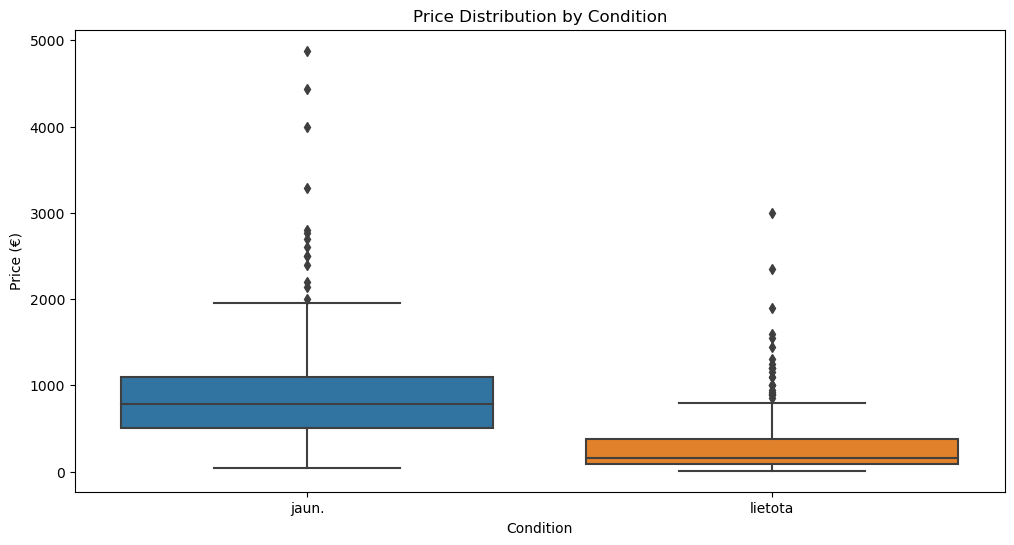

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating average price by condition
avg_price_by_condition = df.groupby('Stāvoklis:')['Cena'].mean()

print("\nAverage Price by Condition:\n", avg_price_by_condition)

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Stāvoklis:', y='Cena')
plt.title('Price Distribution by Condition')
plt.ylabel('Price (€)')
plt.xlabel('Condition')
plt.show()
